In [1]:
import datetime

import pandas as pd
from matplotlib import pyplot as plt

from periodic_patterns_v2 import TimeStampSetV2
from periodicity import get_topk_periods

Matplotlib is building the font cache; this may take a moment.


# load some data

In [2]:
df = pd.read_csv('proxy_login.log.csv')
df

,timestamp,connectivity,login_redirect,duration,successfully_logged_in
0,2019-05-02 09:17:46.616877,1,1,0.249972,1
1,2019-05-02 09:18:46.867337,1,0,0.093758,1
2,2019-05-02 09:19:00.143748,1,0,0.114271,1
3,2019-05-02 09:20:00.269821,1,0,0.096899,1
4,2019-05-02 09:21:00.370104,1,0,0.089100,1
...,...,...,...,...,...
1239294,2021-04-29 09:37:26.916492,1,0,0.195693,1
1239295,2021-04-29 09:37:57.127294,1,0,0.236791,1
1239296,2021-04-29 09:38:27.366692,1,0,0.202785,1
1239297,2021-04-29 09:38:57.574767,1,0,0.228706,1


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
# filter to downtime events after 1 jun 2020
timestamps = df[(df['connectivity'] == 0) & (df['timestamp'] > pd.to_datetime('2020-06-01'))]['timestamp']
timestamps

510146    2020-06-01 04:01:02.489888
511320    2020-06-01 23:41:44.043024
511321    2020-06-01 23:43:14.063766
511322    2020-06-01 23:44:44.068720
511323    2020-06-01 23:46:14.078737
                     ...            
1212660   2021-04-06 15:56:32.127889
1217003   2021-04-09 19:14:28.016380
1217004   2021-04-09 19:15:28.066834
1230650   2021-04-14 14:47:21.196864
1233131   2021-04-27 05:27:57.090156
Name: timestamp, Length: 1996, dtype: datetime64[ns]

# events

In [5]:
tss = TimeStampSetV2(timestamps)
len(tss)

1996

<AxesSubplot:title={'center':'hour / day-of-week'}, xlabel='day of week', ylabel='hour'>

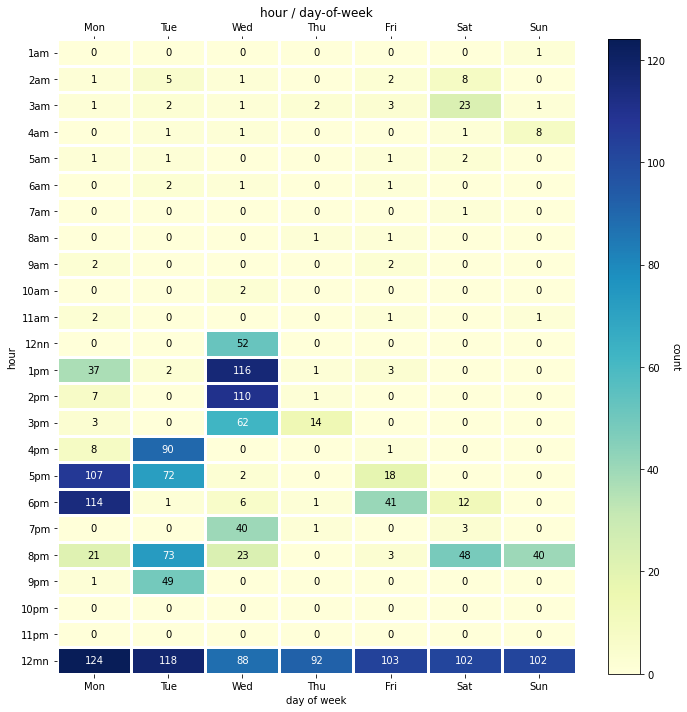

In [6]:
tss.hour_of_day.plot()

<AxesSubplot:title={'center':'n-th day-of-week of each month'}, xlabel='day of week', ylabel='n'>

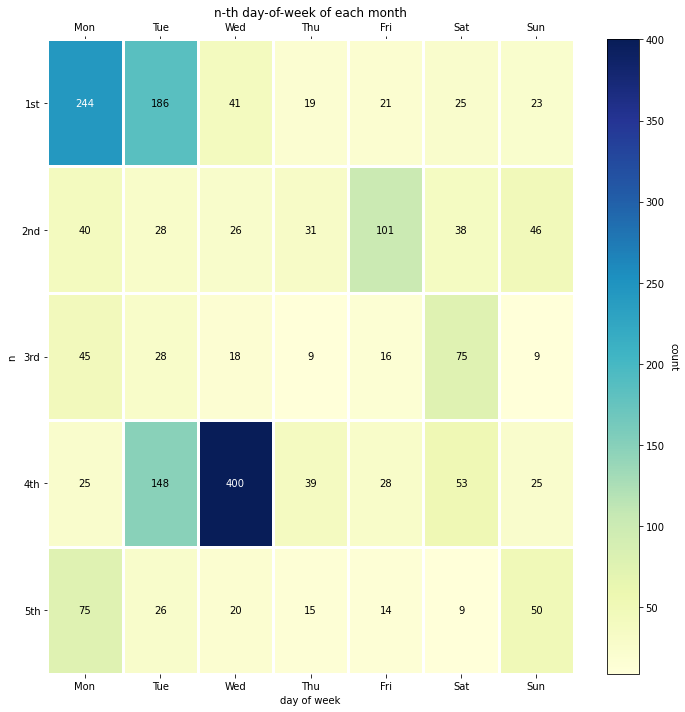

In [7]:
tss.nth_day_of_month.plot()

<AxesSubplot:title={'center':'n-th full week in month / day-of-week'}, xlabel='day of week', ylabel='n-th full week'>

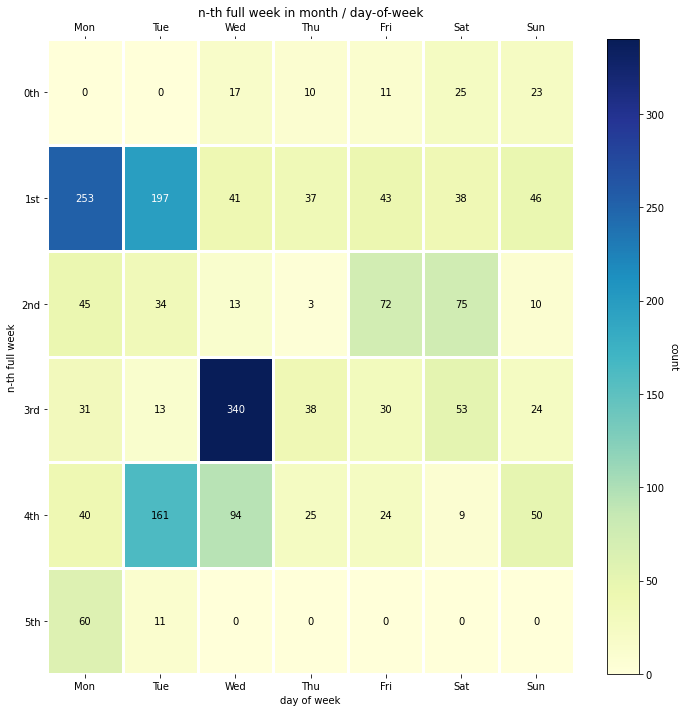

In [8]:
tss.full_week_of_month.plot()

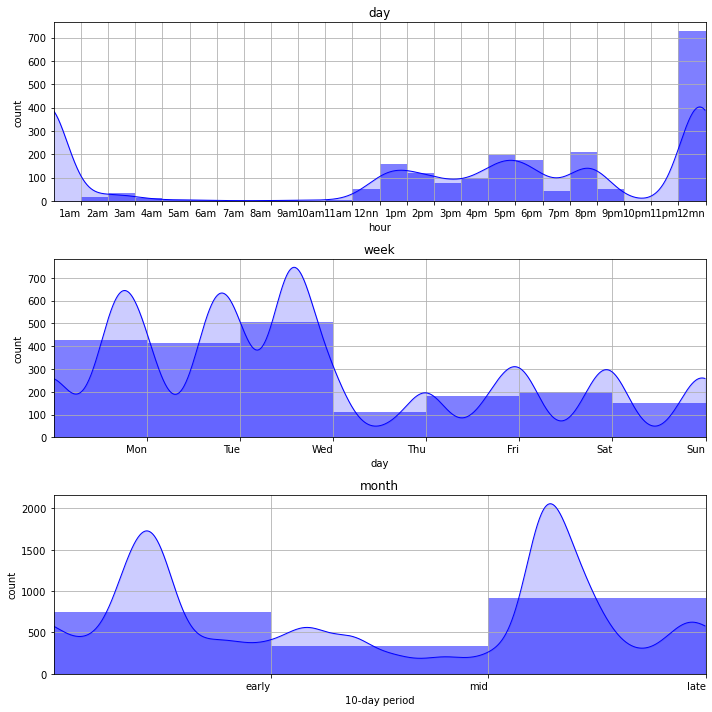

In [9]:
tss.plot()

# group events into sessions based on inter-event times

In [10]:
# group together events N minutes apart and check the number of resulting sessions
for i in range(1,61):
    print(i, len(tss.sessions(datetime.timedelta(minutes=i))))

1 976
2 175
3 172
4 171
5 169
6 168
7 167
8 165
9 164
10 162
11 162
12 160
13 160
14 160
15 159
16 159
17 159
18 158
19 157
20 156
21 156
22 155
23 155
24 155
25 155
26 155
27 155
28 155
29 155
30 155
31 155
32 155
33 154
34 153
35 153
36 153
37 153
38 153
39 153
40 153
41 153
42 153
43 153
44 153
45 153
46 153
47 153
48 152
49 152
50 152
51 152
52 152
53 152
54 152
55 152
56 152
57 152
58 152
59 152
60 152


In [11]:
tss2 = tss.session_set(datetime.timedelta(minutes=10))
len(tss2)

162

In [12]:
tss2.timestamps

[datetime.datetime(2020, 6, 1, 4, 1, 2, 489888, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 1, 23, 41, 44, 43024, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 2, 23, 41, 8, 499145, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 3, 23, 41, 24, 895289, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 4, 23, 41, 34, 160596, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 5, 10, 5, 44, 31497, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 5, 23, 41, 21, 688197, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 6, 23, 41, 51, 940566, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 7, 23, 41, 54, 939992, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 8, 8, 22, 21, 366348, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 8, 10, 0, 4, 712705, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 8, 12, 6, 5, 677643, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 6, 

<AxesSubplot:title={'center':'hour / day-of-week'}, xlabel='day of week', ylabel='hour'>

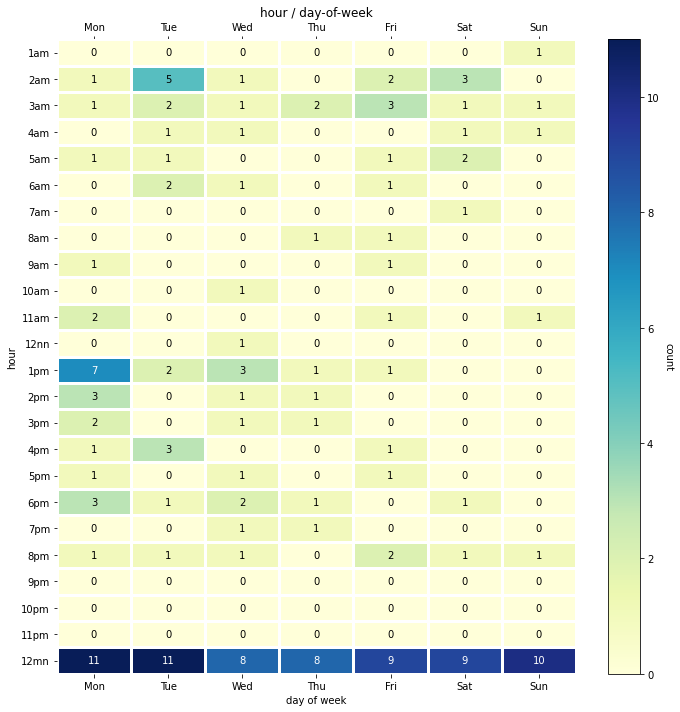

In [13]:
tss2.hour_of_day.plot()

<AxesSubplot:title={'center':'n-th day-of-week of each month'}, xlabel='day of week', ylabel='n'>

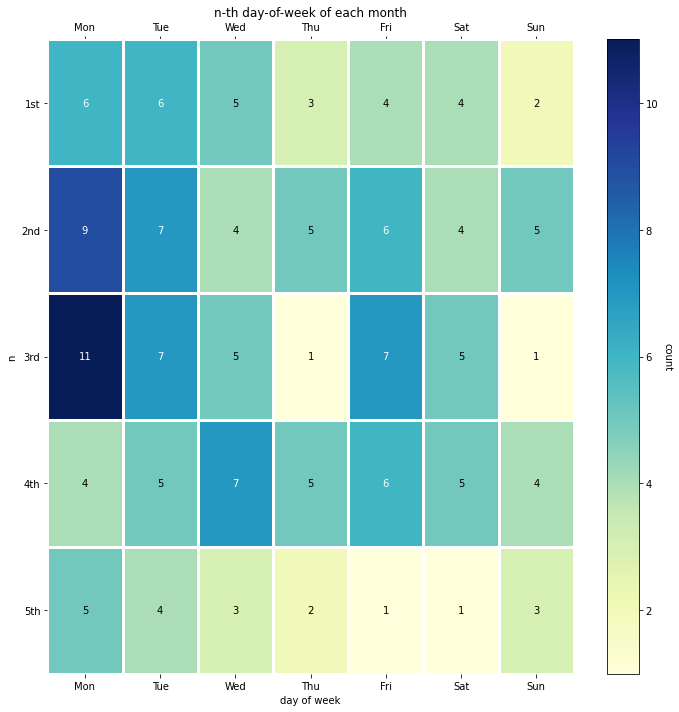

In [14]:
tss2.nth_day_of_month.plot()

<AxesSubplot:title={'center':'n-th full week in month / day-of-week'}, xlabel='day of week', ylabel='n-th full week'>

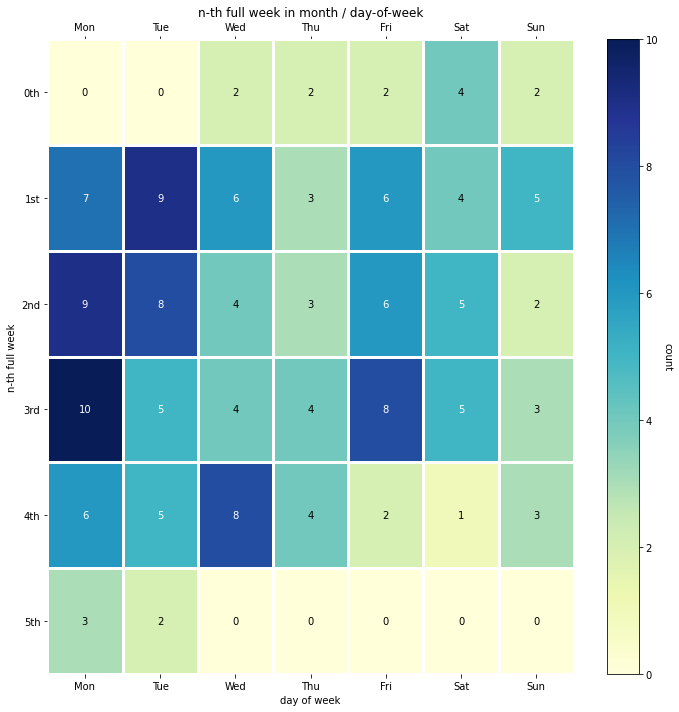

In [15]:
tss2.full_week_of_month.plot()

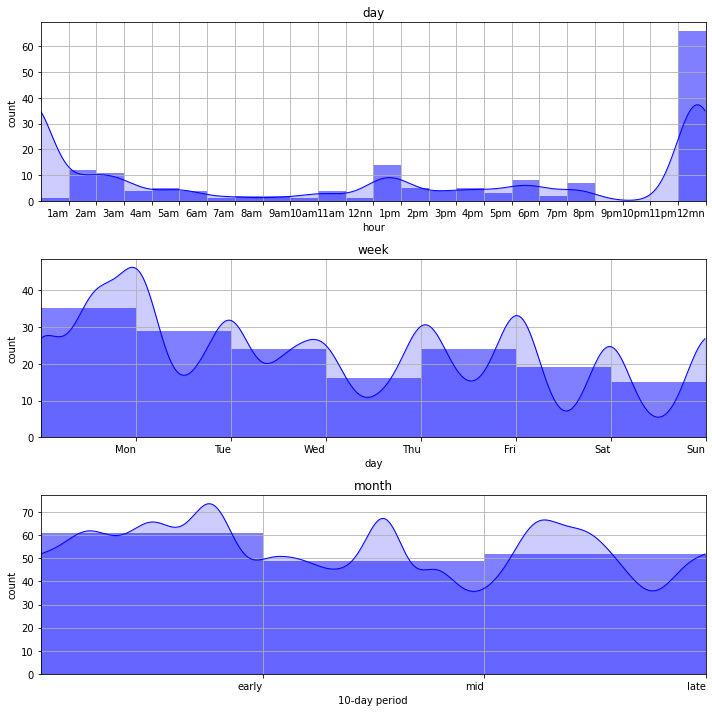

In [16]:
tss2.plot()

<AxesSubplot:title={'center':'day'}, xlabel='hour', ylabel='count'>

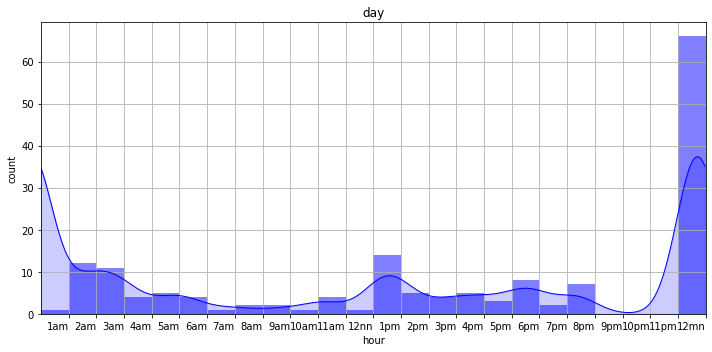

In [17]:
tss2.day.plot(figsize=(10,5))

<AxesSubplot:title={'center':'week'}, xlabel='day', ylabel='count'>

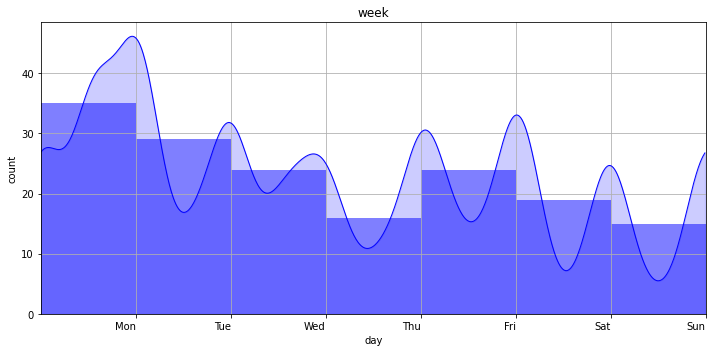

In [18]:
tss2.week.plot(figsize=(10,5))

<AxesSubplot:title={'center':'month'}, xlabel='10-day period', ylabel='count'>

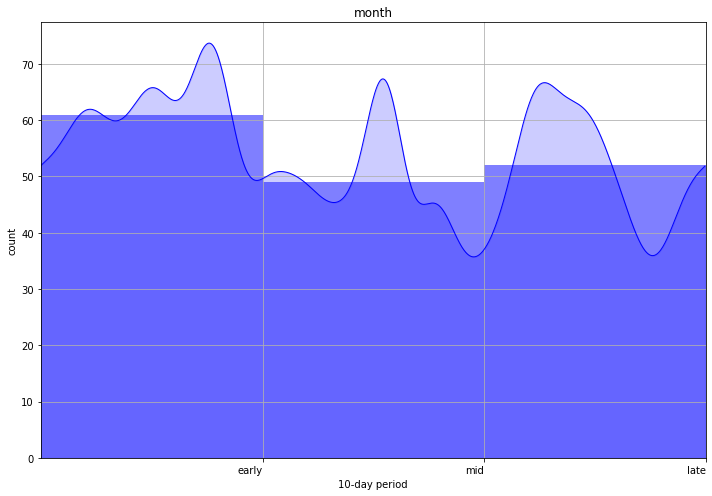

In [19]:
tss2.month.plot(figsize=(10,7))

2020-06-01 04:01:02.489888+00:00 0.12730679811979506
2020-06-05 10:05:44.031497+00:00 0.14375924632150558
2020-06-08 08:22:21.366348+00:00 0.09281299840876853
2020-06-08 08:23:51.382576+00:00 0.09281299840876853
2020-06-08 10:00:04.712705+00:00 0.12508408469071566
2020-06-08 12:06:05.677643+00:00 0.3620632756591745
2020-06-08 12:39:18.110069+00:00 0.3865562610681881
2020-06-09 01:08:19.101486+00:00 0.3008600434729815
2020-06-09 12:34:15.385350+00:00 0.35353782457036587
2020-06-11 02:47:58.925482+00:00 0.1607407029465298
2020-06-11 12:19:49.044956+00:00 0.199469543912639
2020-06-12 16:42:32.155229+00:00 0.367894387071457
2020-06-12 16:43:32.157825+00:00 0.367894387071457
2020-06-12 16:44:32.160564+00:00 0.367894387071457
2020-06-12 16:45:32.168224+00:00 0.367894387071457
2020-06-12 16:46:32.170527+00:00 0.3677886513499109
2020-06-12 16:47:32.173298+00:00 0.3677886513499109
2020-06-12 16:48:32.175395+00:00 0.3677886513499109
2020-06-12 16:49:32.177478+00:00 0.3677886513499109
2020-06-12 

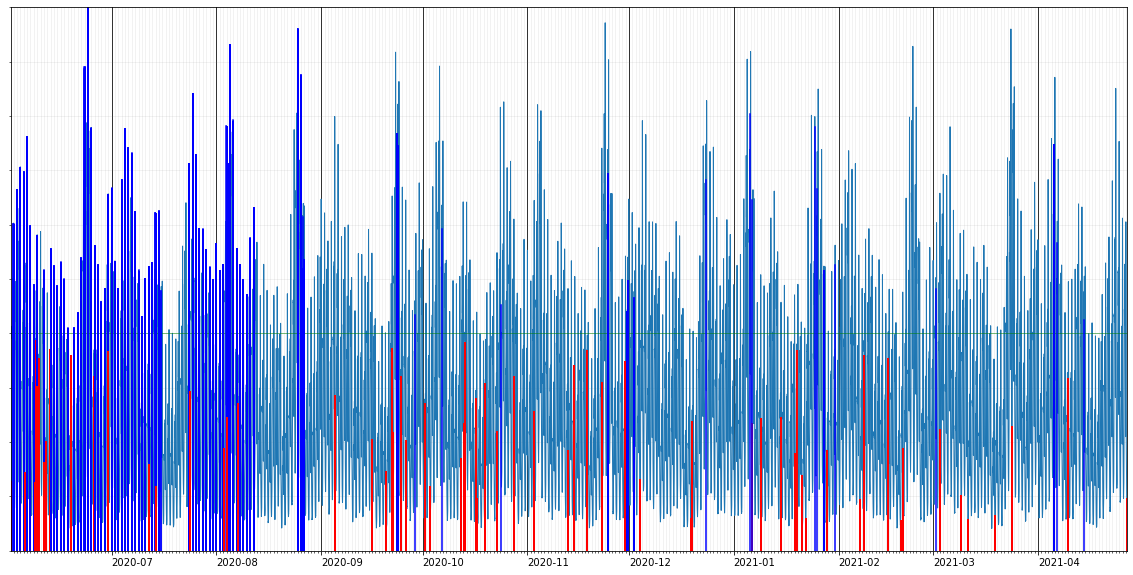

In [20]:
tss.plot_session_likelihoods(figsize=(20,10))

2020-06-01 04:01:02.489888+00:00 0.3665984495795166
2020-06-05 10:05:44.031497+00:00 0.28701292484969393
2020-06-08 08:22:21.366348+00:00 0.3007910870224619
2020-06-08 10:00:04.712705+00:00 0.3805684646572788
2020-06-11 12:19:49.044956+00:00 0.34058957404530354
2020-06-12 16:42:32.155229+00:00 0.3374487603256251
2020-06-25 18:07:18.178993+00:00 0.359590831089496
2020-07-12 03:07:51.694722+00:00 0.38192012391821356
2020-07-14 04:35:44.517068+00:00 0.375404990270457
2020-07-15 16:57:23.576988+00:00 0.38208610339286725
2020-08-04 15:01:51.376104+00:00 0.33440142501233233
2020-08-26 18:07:45.852612+00:00 0.39353570751446937
2020-08-26 19:22:36.929792+00:00 0.36650416325940854
2020-09-20 02:07:04.846999+00:00 0.3983819384388615
2020-09-23 11:32:01.260893+00:00 0.38147391591544677
2020-09-24 14:40:14.519870+00:00 0.29979130369520335
2020-10-01 17:28:07.165935+00:00 0.35690801351738793
2020-10-03 04:38:57.948857+00:00 0.37148467567658433
2020-10-06 15:56:43.397595+00:00 0.3597952719431161
202

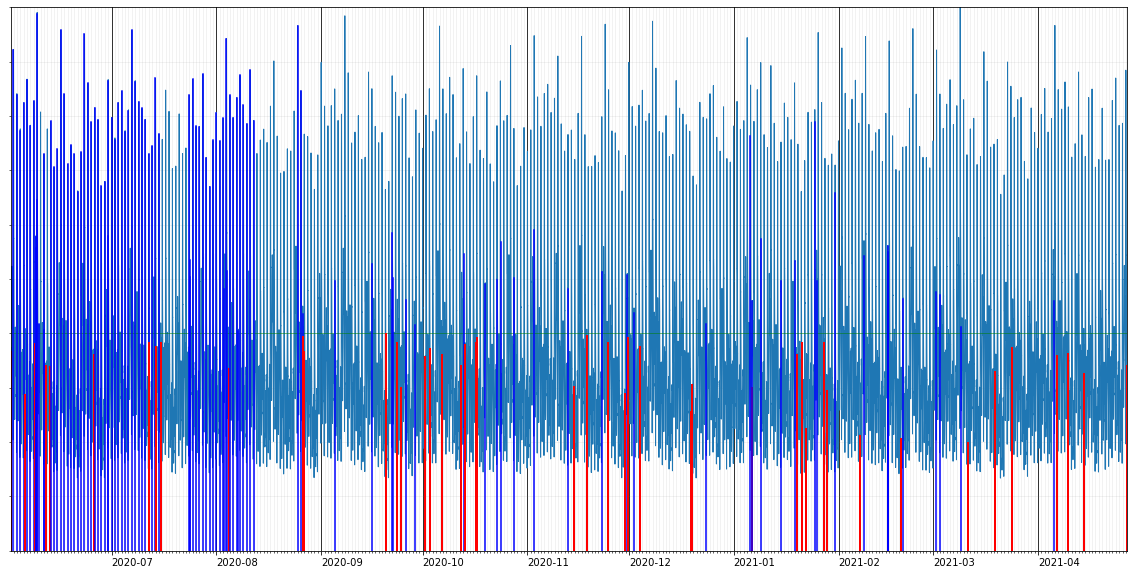

In [21]:
tss2.plot_session_likelihoods(figsize=(20,10))

2020-06-01 04:01:02.489888+00:00 0.3665984495795166
2020-06-05 10:05:44.031497+00:00 0.28701292484969393
2020-06-08 08:22:21.366348+00:00 0.3007910870224619
2020-06-08 10:00:04.712705+00:00 0.3805684646572788
2020-06-11 12:19:49.044956+00:00 0.34058957404530354
2020-06-12 16:42:32.155229+00:00 0.3374487603256251
2020-06-25 18:07:18.178993+00:00 0.359590831089496
2020-07-12 03:07:51.694722+00:00 0.38192012391821356
2020-07-14 04:35:44.517068+00:00 0.375404990270457
2020-07-15 16:57:23.576988+00:00 0.38208610339286725
2020-08-04 15:01:51.376104+00:00 0.33440142501233233
2020-08-26 18:07:45.852612+00:00 0.39353570751446937
2020-08-26 19:22:36.929792+00:00 0.36650416325940854
2020-09-20 02:07:04.846999+00:00 0.3983819384388615
2020-09-23 11:32:01.260893+00:00 0.38147391591544677
2020-09-24 14:40:14.519870+00:00 0.29979130369520335
2020-10-01 17:28:07.165935+00:00 0.35690801351738793
2020-10-03 04:38:57.948857+00:00 0.37148467567658433
2020-10-06 15:56:43.397595+00:00 0.3597952719431161
202

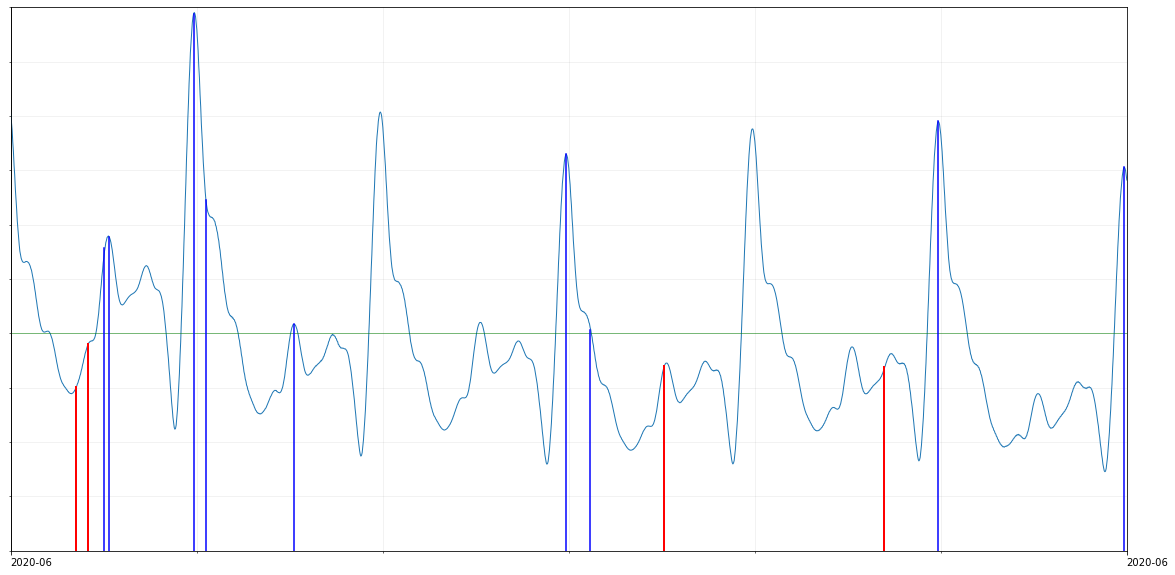

In [22]:
# filter to about 1 week
tss2.plot_session_likelihoods(figsize=(20,10), x_lim=(datetime.datetime(2020,6,8),datetime.datetime(2020,6,14)))

2020-06-01 04:01:02.489888+00:00 0.3665984495795166
2020-06-05 10:05:44.031497+00:00 0.28701292484969393
2020-06-08 08:22:21.366348+00:00 0.3007910870224619
2020-06-08 10:00:04.712705+00:00 0.3805684646572788
2020-06-11 12:19:49.044956+00:00 0.34058957404530354
2020-06-12 16:42:32.155229+00:00 0.3374487603256251
2020-06-25 18:07:18.178993+00:00 0.359590831089496
2020-07-12 03:07:51.694722+00:00 0.38192012391821356
2020-07-14 04:35:44.517068+00:00 0.375404990270457
2020-07-15 16:57:23.576988+00:00 0.38208610339286725
2020-08-04 15:01:51.376104+00:00 0.33440142501233233
2020-08-26 18:07:45.852612+00:00 0.39353570751446937
2020-08-26 19:22:36.929792+00:00 0.36650416325940854
2020-09-20 02:07:04.846999+00:00 0.3983819384388615
2020-09-23 11:32:01.260893+00:00 0.38147391591544677
2020-09-24 14:40:14.519870+00:00 0.29979130369520335
2020-10-01 17:28:07.165935+00:00 0.35690801351738793
2020-10-03 04:38:57.948857+00:00 0.37148467567658433
2020-10-06 15:56:43.397595+00:00 0.3597952719431161
202

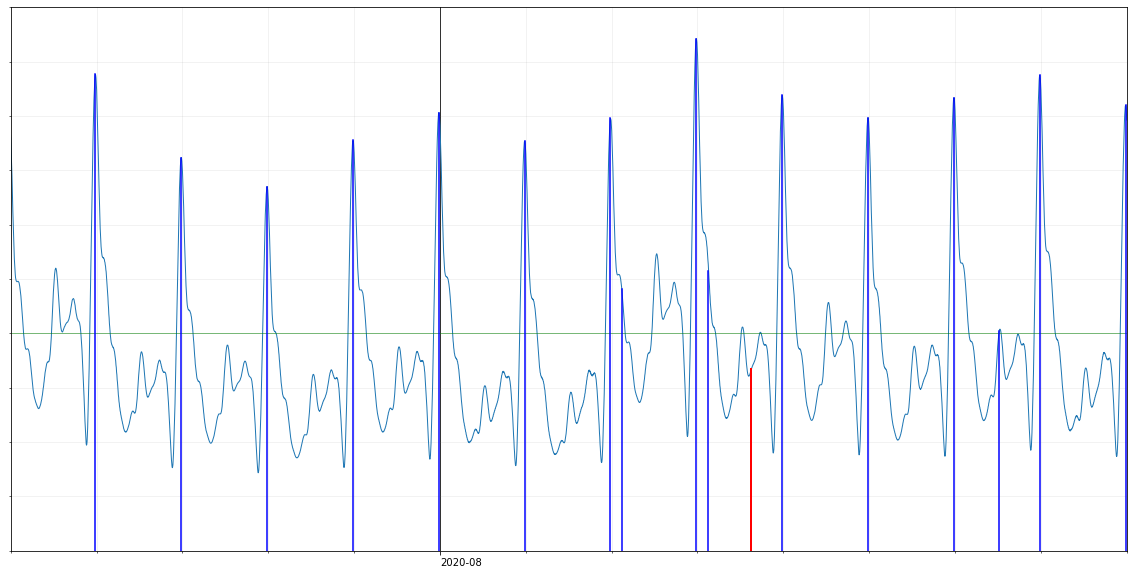

In [23]:
tss2.plot_session_likelihoods(figsize=(20,10), x_lim=(datetime.datetime(2020,7,27),datetime.datetime(2020,8,9)))

# periodicity via fourier transform

In [24]:
df = get_topk_periods(pd.Series(pd.to_datetime(tss2.timestamps)), k=1000)
df

flattening...
have 162 unique timestamps
not thresholding, only have 162 unique timestamps (less than 1000)
fft...
making dataframe...


,magnitude,period_seconds,period_days,period_timedelta,period_formatted,weight
10029,90.423922,43228.0,0.500324,0 days 12:00:28,12.01 hours,4.504509
1040,87.929665,1041.0,0.012049,0 days 00:17:21,17.35 minutes,4.476537
1251,80.996377,1252.0,0.014491,0 days 00:20:52,20.87 minutes,4.394404
1762,79.595990,1763.0,0.020405,0 days 00:29:23,29.38 minutes,4.376964
744,78.972515,745.0,0.008623,0 days 00:12:25,12.42 minutes,4.369100
...,...,...,...,...,...,...
780,24.840611,781.0,0.009039,0 days 00:13:01,13.02 minutes,3.212480
1069,24.834855,1070.0,0.012384,0 days 00:17:50,17.83 minutes,3.212248
2158,24.832504,2159.0,0.024988,0 days 00:35:59,35.98 minutes,3.212153
3707,24.826925,3708.0,0.042917,0 days 01:01:48,1.03 hours,3.211929


note: too many harmonics to be useful

In [25]:
df[(df['period_seconds'] > 3600) & (df['magnitude'] > 30)].sort_values('period_seconds', ascending=False).head(10)

,magnitude,period_seconds,period_days,period_timedelta,period_formatted,weight
10689,49.689894,28573696.0,330.714074,330 days 17:08:16,0.91 years,3.905802
10688,36.478103,14286848.0,165.357037,165 days 08:34:08,5.43 months,3.596712
10687,41.155085,9524565.0,110.238021,110 days 05:42:45,3.62 months,3.717348
10678,35.587274,2381141.0,27.559502,27 days 13:25:41,0.91 months,3.571988
10677,32.401462,2197977.0,25.439549,25 days 10:32:57,3.63 weeks,3.478204
10627,30.985585,453551.0,5.249433,5 days 05:59:11,5.25 days,3.433522
10361,43.461255,86850.0,1.005208,1 days 00:07:30,1.01 days,3.771870
10360,64.428073,86587.0,1.002164,1 days 00:03:07,1.00 days,4.165549
10359,67.719829,86325.0,0.999132,0 days 23:58:45,1.00 days,4.215379
10358,45.223318,86065.0,0.996123,0 days 23:54:25,1.00 days,3.811613
